<a href="https://colab.research.google.com/github/vicensi/Deep-learning/blob/main/Exemplo_Autoencoder_Remo%C3%A7%C3%A3o_de_Ru%C3%ADdos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

# suavização de dados temporais, dados em serie, melhor que media movel
# ruidos em imagens

In [ ]:
def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

In [ ]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)


11490434/11490434 [==============================] - 0s 0us/step


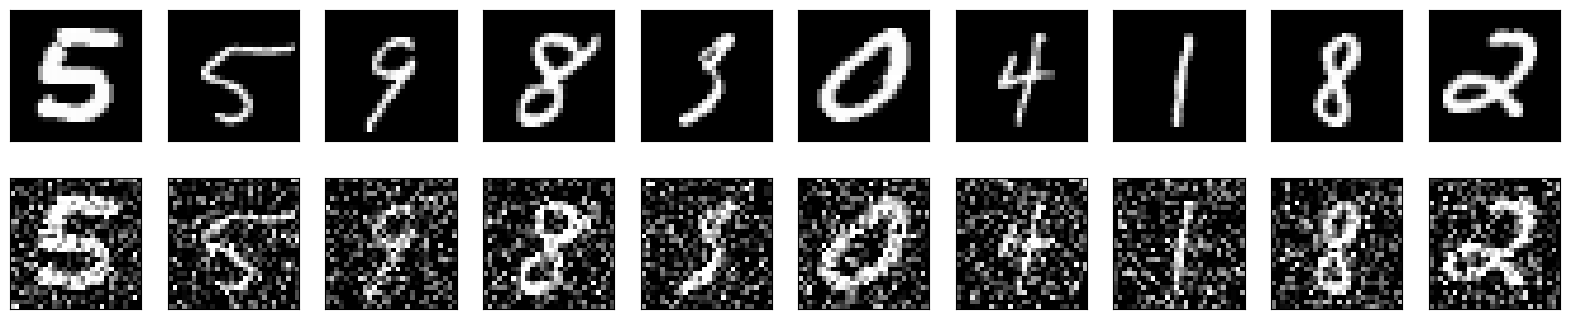

In [ ]:
# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

In [ ]:
input = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = MaxPooling2D((2, 2), padding="same")(x)
x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = MaxPooling2D((2, 2), padding="same")(x)

In [ ]:
# Decoder
x = Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = Conv2DTranspose(32, (4, 4), strides=2, activation="relu", padding="same")(x)
x = Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

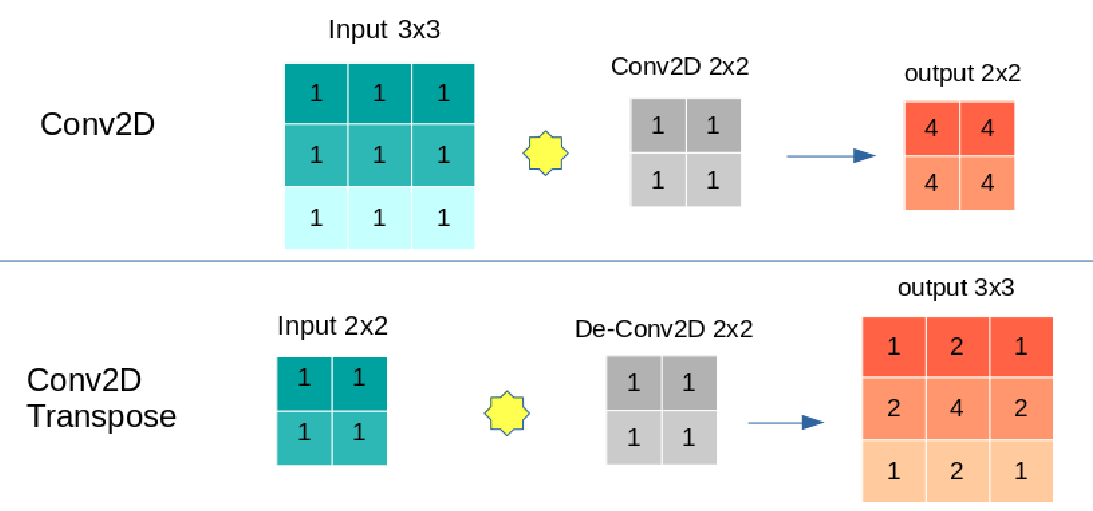

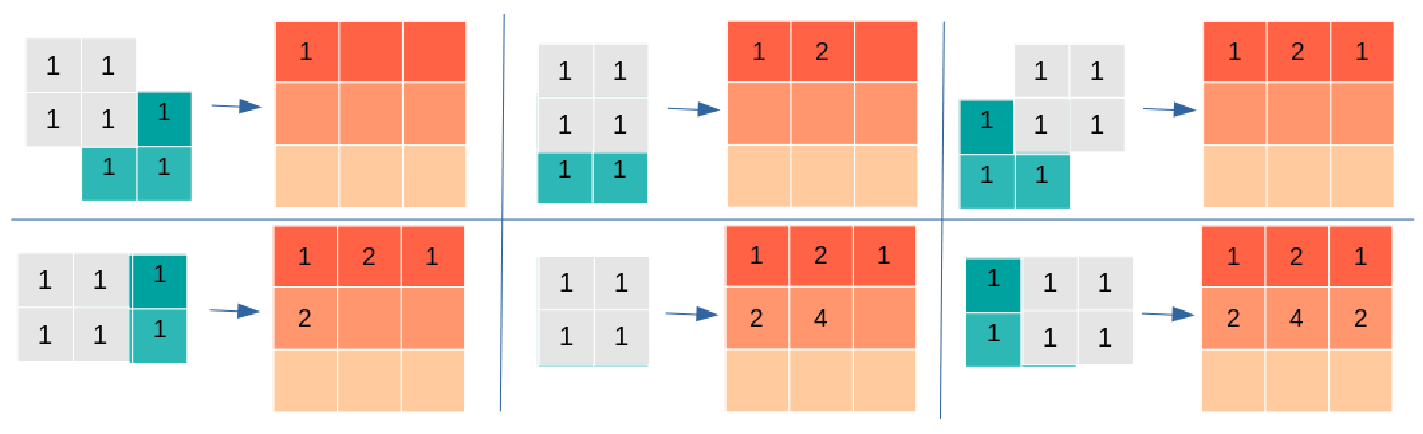

In [ ]:
# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 32)        9248  

In [ ]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Epoch 1/100
469/469 [==============================] - 10s 9ms/step - loss: 0.1699 - val_loss: 0.1027
Epoch 2/100
469/469 [==============================] - 4s 9ms/step - loss: 0.0995 - val_loss: 0.0958
Epoch 3/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0951 - val_loss: 0.0927
Epoch 4/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0926 - val_loss: 0.0908
Epoch 5/100
469/469 [==============================] - 4s 7ms/step - loss: 0.0909 - val_loss: 0.0899
Epoch 6/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0898 - val_loss: 0.0888
Epoch 7/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0890 - val_loss: 0.0881
Epoch 8/100
469/469 [==============================] - 3s 7ms/step - loss: 0.0884 - val_loss: 0.0875
Epoch 9/100
469/469 [==============================] - 4s 8ms/step - loss: 0.0879 - val_loss: 0.0876
Epoch 10/100
469/469 [==============================] - 4s 7ms/step - loss: 0.0875 - val_l

In [ ]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)